In [107]:
import numpy as np
from numpy import random
from numpy.random import choice

def normpdf(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

def multinomial_resampling(weights):
    N = len(weights)
    indices = np.arange(N)
    resampled_indices = choice(indices, size=N, replace=True, p=weights)
    return resampled_indices

def tractable_smc_fredholm(N, f_1, Y, epsilon):
    # N is the number of particles 
    # f_1 is an N-dimensional initialization distribution
    # Y is an array of sample observations
    # epsilon is the standard deviation of the Gaussian smoothing kernel

    # Number of observations
    n = len(Y)

    # Initialization
    X_particles = np.zeros((n, N))
    Y_particles = np.zeros((n, N))
    weights = np.zeros((n, N))

    # at time n=1
    # Initial distribution is given as the input 
    X_particles[0, :] = f_1
    # Uniform weights are given as the input
    weights[0, :] = np.ones(N) / N 
    Y_particles[0, :] = Y

    # at time n>1
    for i in range(1, n):
        # Markov Chain step
        X_particles[i, :] = X_particles[i-1, :] + epsilon * np.random.standard_normal(N)

        weights[i, :] = weights[i-1, :]
        # draw samples from Y 
        hN = np.zeros(N) 
        for j in range(N):
            hN[j] = np.mean(weights[i, :] * normpdf(Y[j], X_particles[i, :], 0.045))

        # calculate potentials
        potential = np.zeros(N)
        g=np.zeros(N)
        averg=np.zeros(N)
        for j in range (N):
            g = normpdf(Y, X_particles[i, j], 0.045)
            potential = np.divide(g,hN)
            averg[j]= np.mean(potential)
        
        # update and normalize weights 
        weights[i, :] = weights[i, :] * averg

        weights[i, :] = weights[i, :] / np.sum(weights[i, :])

        # Resampling particles with updated weights
        # Y_particles[i, :] = choice(Y_particles[i-1, :], N, replace=False, p=weights[i-1,:])
        
        # Effective Sample Size (ESS)
        ESS = 1 / np.sum(weights[i, :]**2)
        
        # Resampling
        if ESS < N / 2:
            indices = multinomial_resampling(weights[i, :])
            X_particles[i, :] = X_particles[i, indices]
            weights[i, :] = np.ones(N) / N
        else:
            X_particles[i, :] = X_particles[i, :]
            weights[i, :] = weights[i, :]

    return X_particles

 



In [108]:
target_data= tractable_smc_fredholm(1000, random.standard_normal(1000)+0.5, 0.5 + np.sqrt((0.043**2+0.045**2)) * random.standard_normal(1000), 0.01)

In [109]:
particle_1 = target_data[:,-1]
particle_1

array([0.20133542, 0.46376836, 0.45895239, 0.45225075, 0.43876944,
       0.45517386, 0.44689516, 0.44461662, 0.43596044, 0.42622319,
       0.44871686, 0.44184651, 0.42155346, 0.41454722, 0.41005816,
       0.41667806, 0.41866486, 0.41432644, 0.42028355, 0.43005267,
       0.43002637, 0.41651609, 0.41923687, 0.43752068, 0.50416899,
       0.50805648, 0.50680482, 0.50367375, 0.49919751, 0.49234746,
       0.49453789, 0.48967323, 0.49307726, 0.48333665, 0.49338687,
       0.49663876, 0.48170816, 0.48665031, 0.49015544, 0.49526666,
       0.49983517, 0.48620039, 0.50033248, 0.50894419, 0.49664209,
       0.49561551, 0.47889716, 0.49553626, 0.50295548, 0.51601192,
       0.52081231, 0.52560917, 0.51738356, 0.51612778, 0.50623867,
       0.47286107, 0.47931898, 0.47543895, 0.4812511 , 0.49081984,
       0.47688775, 0.47988452, 0.49276599, 0.48515593, 0.48469573,
       0.47264194, 0.47050947, 0.48125686, 0.48990943, 0.48173519,
       0.47790337, 0.47939802, 0.47212135, 0.47365724, 0.57622

In [111]:
 #target_data[0,:]

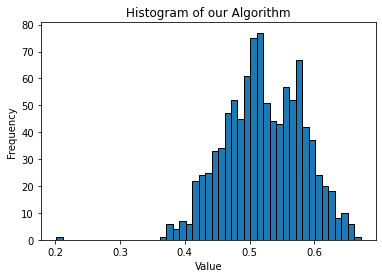

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data as a NumPy array
data = particle_1

# Define bin size
bin_size = 0.01

# Compute bin edges
bins = np.arange(min(data), max(data) + bin_size, bin_size)

# Plot histogram
plt.hist(data, bins=bins, edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of our Algorithm')

# Show the plot
plt.show()